In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
# loading the dataset
df = pd.read_csv('../datasets/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [120]:
# exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [121]:
# dimensions
df.shape

(200000, 9)

In [122]:
# statistical summary
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [123]:
# datatype compatibility check

In [124]:
# before conversion
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [125]:
# after conversion
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.dtypes

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [126]:
df['pickup_datetime']

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 200000, dtype: datetime64[ns, UTC]

In [127]:
# handling null values
print("Null count before handling")
df.isnull().sum()

Null count before handling


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [128]:
df.dropna(inplace=True)
print("Null count before handling")
df.isnull().sum()

Null count before handling


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [129]:
# checking for inappropriate latitudes and longitudes
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) | (df.pickup_latitude < -90) |
       (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
       (df.pickup_longitude > 180) | (df.pickup_longitude < -180) |
       (df.dropoff_longitude > 180) | (df.dropoff_longitude < -180)
       ]
print(f"No. of Rows with Inappropriate Latitude and Longitude Values: {incorrect_coordinates.shape[0]} ")

No. of Rows with Inappropriate Latitude and Longitude Values: 12 


In [130]:
# checking for the negative fares.
negative_fares = df.loc[df.fare_amount < 0]
print(f"No. of Rows with Negative Fare Amount: {negative_fares.shape[0]}")

No. of Rows with Negative Fare Amount: 17


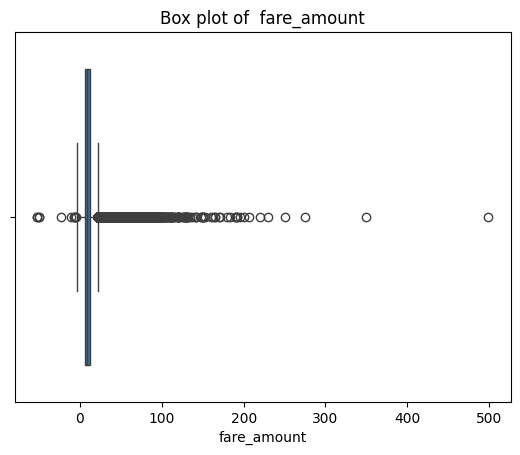

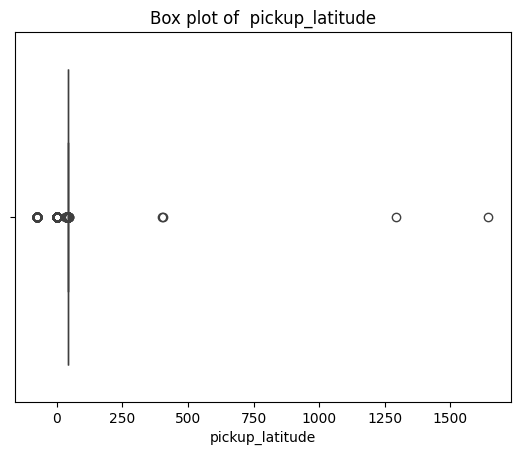

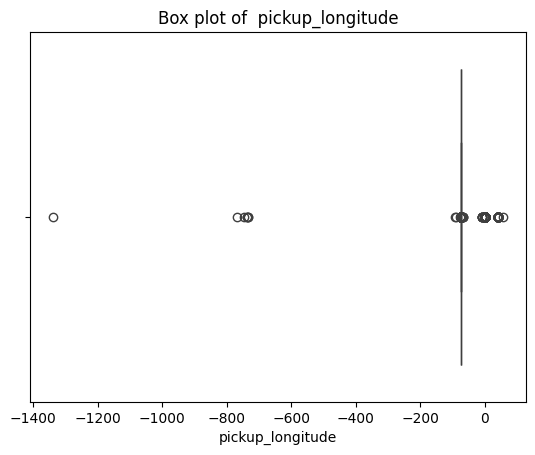

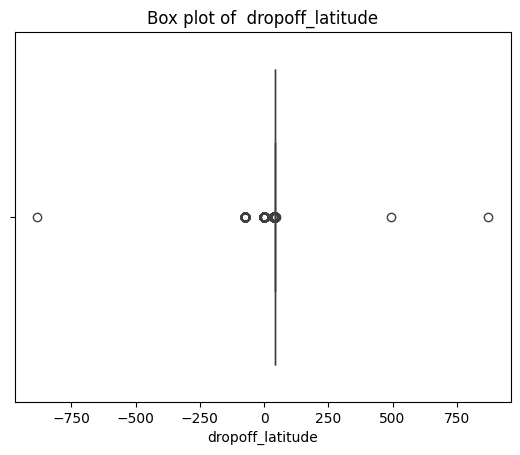

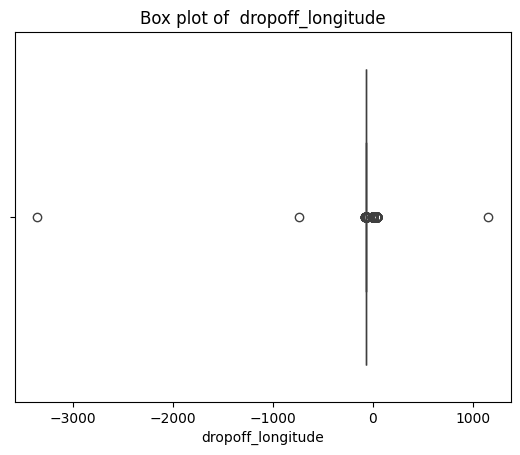

In [131]:
# getting the outliers.
columns = ['fare_amount', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
for col in columns:
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of  {col}")
    plt.show()

In [132]:
# handling the outliers
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # removing the outliers.
    df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

Box plot after handling outliers


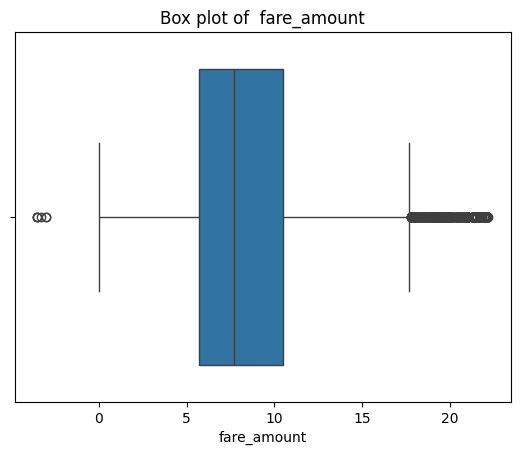

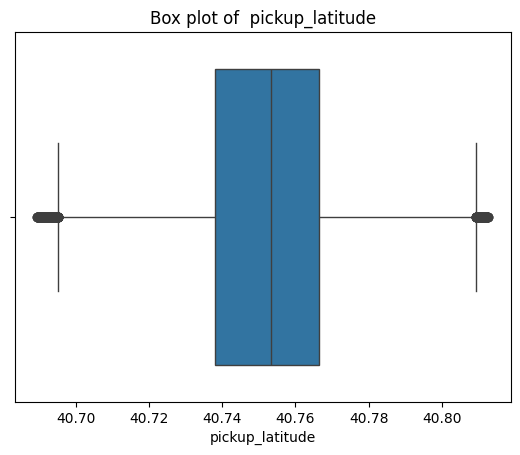

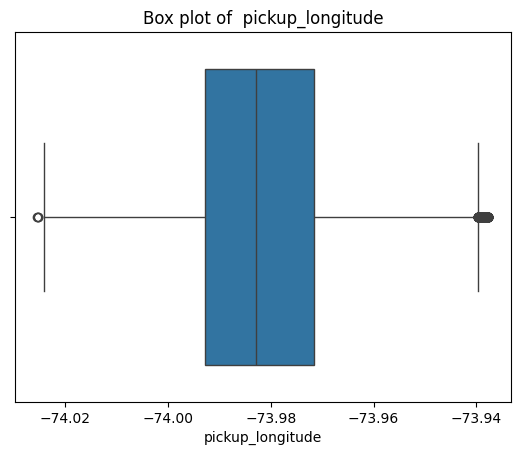

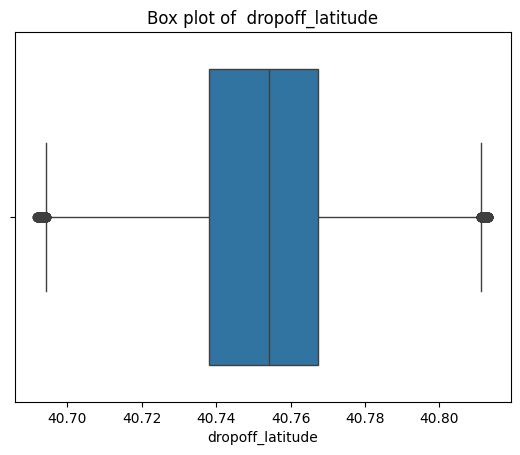

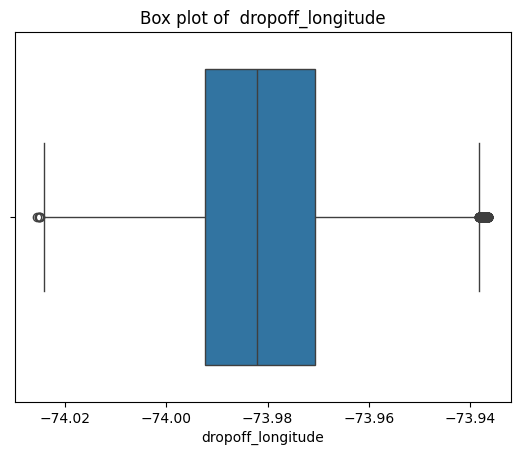

In [133]:
print("Box plot after handling outliers")
columns = ['fare_amount', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']
for col in columns:
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of  {col}")
    plt.show()

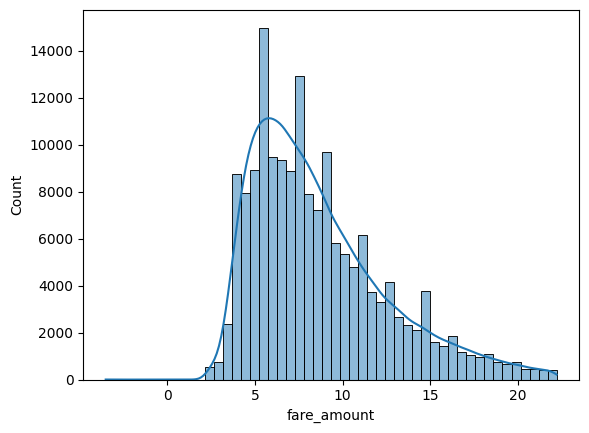

In [134]:
# distribution of fare amount
sns.histplot(data=df['fare_amount'], bins=50, kde=True)
plt.show()

In [135]:
# function for calculation of distance in KM
def haversine_distance(lat1, long1, lat2, long2):
    radius = 6371

    # Converting all latitude and longitude values from degrees → radians
    lat1_rad = np.radians(lat1)
    long1_rad = np.radians(long1)
    lat2_rad = np.radians(lat2)
    long2_rad = np.radians(long2)

    # Calculating the difference in longitude and difference in latitude between the two points
    dlong = long2_rad - long1_rad
    dlat = lat2_rad - lat1_rad

    # Calculating a value a, which represents half the chord length squared between the two points on a sphere
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlong / 2)**2
    # Calculating the central angle (in radians) between the two points on the sphere
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    # Converting the angular distance (in radians) into a linear distance by multiplying by Earth’s radius
    distance = radius * c

    return distance

In [136]:
df['distance_km'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,0.000000


In [137]:
# removing unnecessary features
print(f"Columns before: {df.columns}")
print()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('key', axis=1, inplace=True)
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df.drop('pickup_datetime', axis=1, inplace=True)
print(f"Columns after: {df.columns}")

Columns before: Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'distance_km'],
      dtype='object')

Columns after: Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'distance_km', 'hour', 'day', 'month'],
      dtype='object')


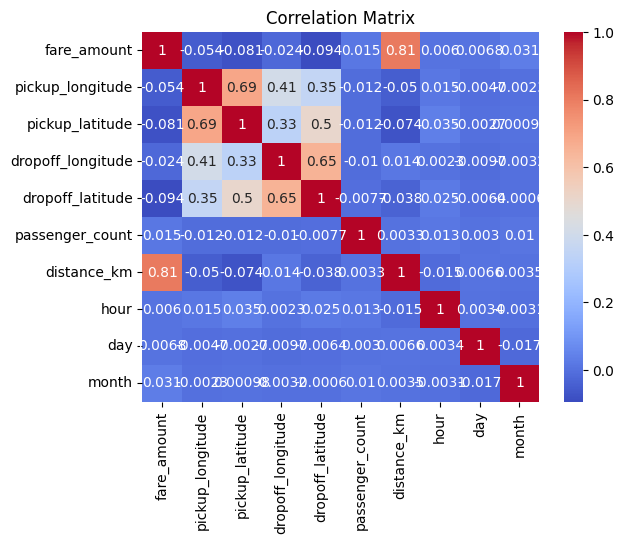

In [138]:
# finding correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [139]:
# splitting the training and testing data
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [140]:
# regression models
linear = LinearRegression()
random_forest = RandomForestRegressor()

In [141]:
# training models
display(linear.fit(X_train, y_train))
display(random_forest.fit(X_train, y_train))

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [142]:
y_pred_linear = linear.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

In [143]:
results = {
    "Linear Regression": {
        "R2 Score": r2_score(y_test, y_pred_linear),
        "RMSE": np.sqrt(mean_squared_error(y_pred_linear, y_test))
    },
    "Random Forest Regression": {
        "R2 Score": r2_score(y_test, y_pred_random_forest),
        "RMSE": np.sqrt(mean_squared_error(y_pred_random_forest, y_test))
    }
}
print("---------------Results---------------")
results

---------------Results---------------


{'Linear Regression': {'R2 Score': 0.651184489597247,
  'RMSE': np.float64(2.2765365559479176)},
 'Random Forest Regression': {'R2 Score': 0.7144486422858873,
  'RMSE': np.float64(2.0597705725882407)}}